**IMPORTS**

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rf
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle


**LOAD DATASET**

In [2]:
df = pd.read_csv("insurance.csv")

**DATA REVIEW**

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

**EDA(Exploratory Data Analysis)**

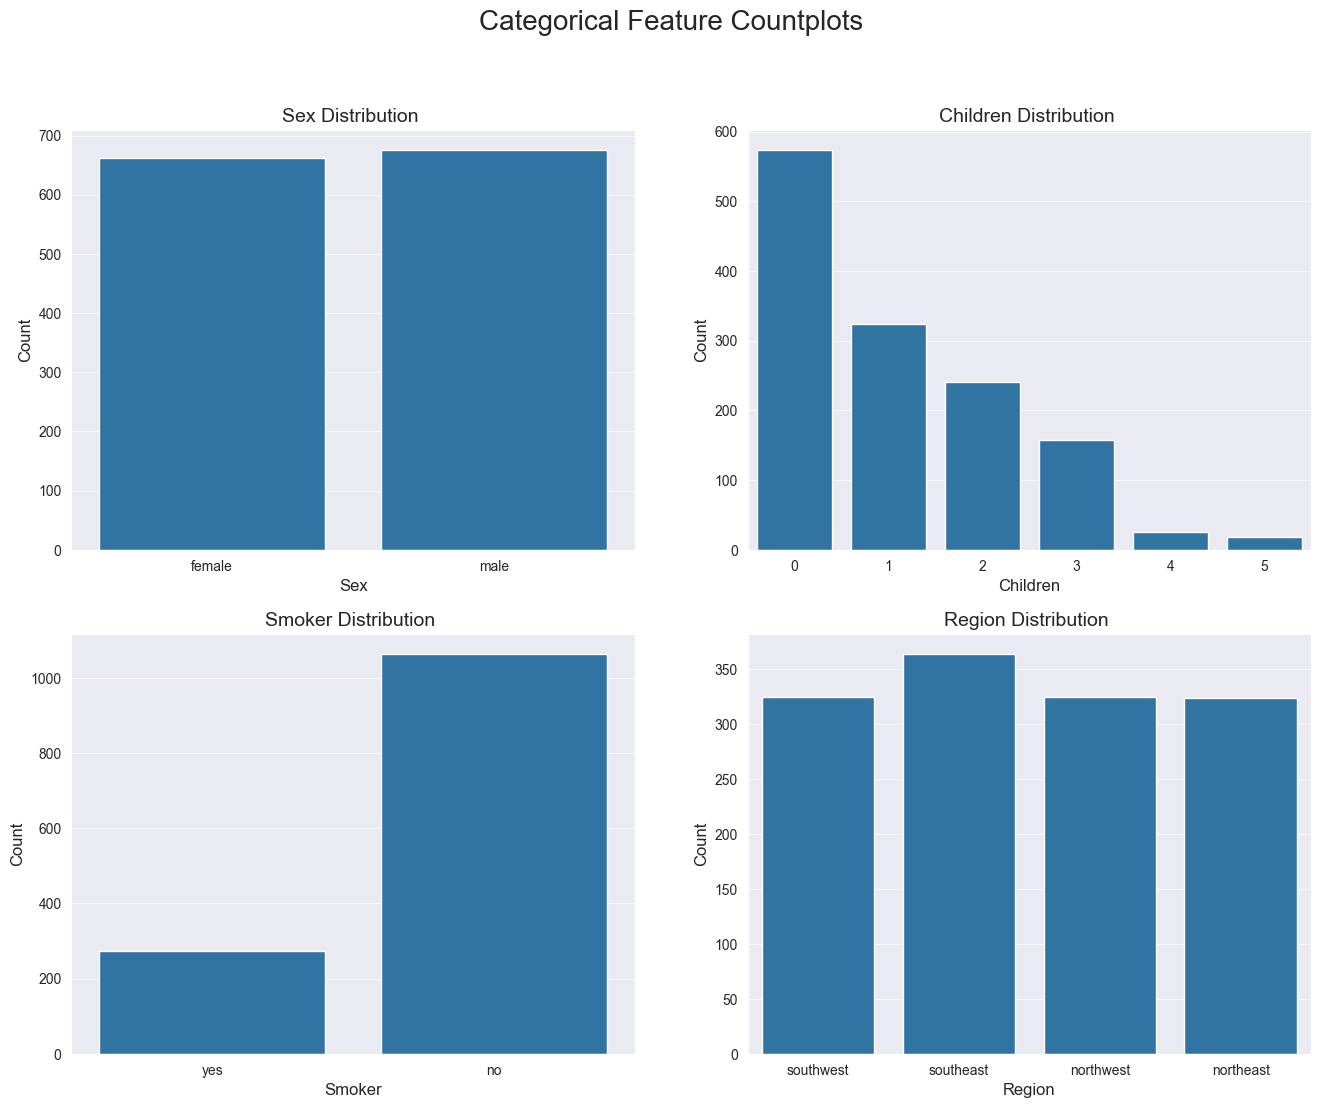

In [40]:
#categorical değişkenlerin dağılımı
columns = ['sex', 'children', 'smoker', 'region']

fig, axes = plt.subplots(2, 2, figsize=(16,12))
fig.suptitle("Categorical Feature Countplots", fontsize=20)

for ax, col in zip(axes.flatten(), columns):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_xlabel(col.capitalize(), fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_title(f"{col.capitalize()} Distribution ", fontsize=14)
    ax.grid(axis='y', alpha=0.7)

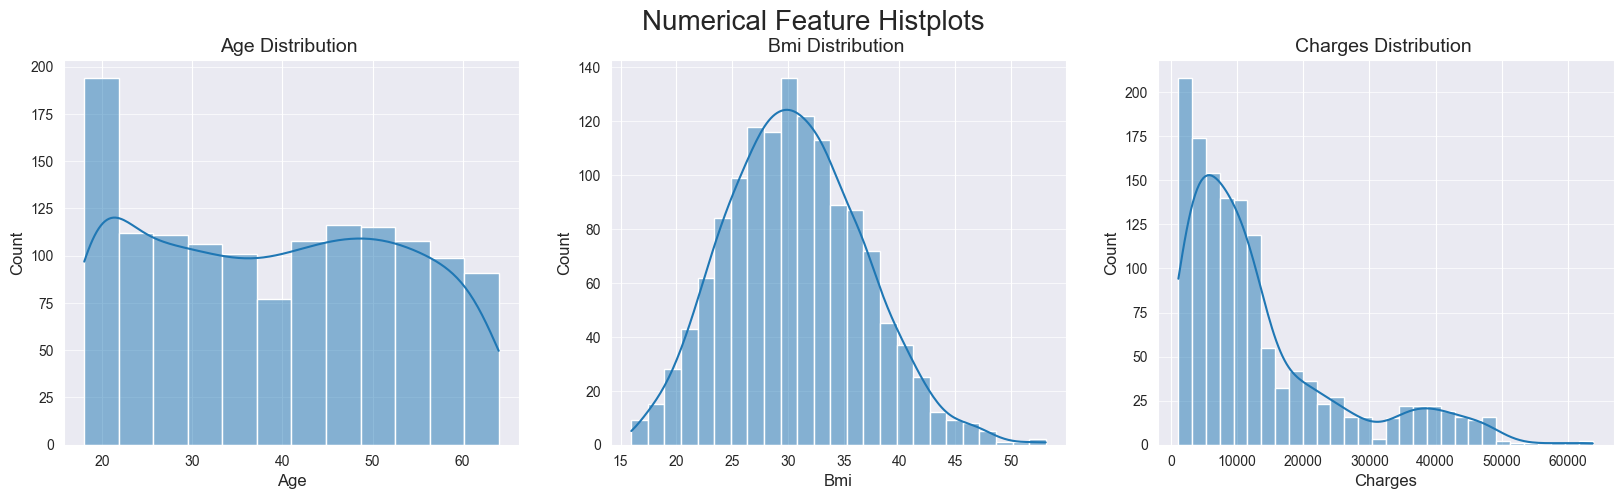

In [14]:
#numeric değişkenlerin dağılımı
columns = ["age","bmi","charges"]

fig, axes = plt.subplots(1,3, figsize=(20,5))
fig.suptitle("Numerical Feature Histplots", fontsize=20)

for ax, col in zip(axes.flatten(), columns):
    sns.histplot(data=df, x=col, ax=ax,kde=True)
    ax.set_xlabel(col.capitalize(), fontsize=12)
    ax.set_xlabel(col.capitalize(), fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_title(f"{col.capitalize()} Distribution ", fontsize=14)
    ax.grid(axis='y', alpha=0.7)

<Axes: xlabel='sex', ylabel='count'>

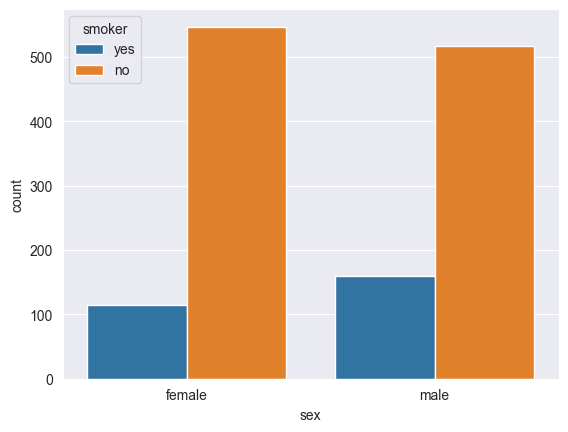

In [44]:
sns.countplot(data=df, x="sex",hue="smoker")

<Axes: xlabel='region', ylabel='count'>

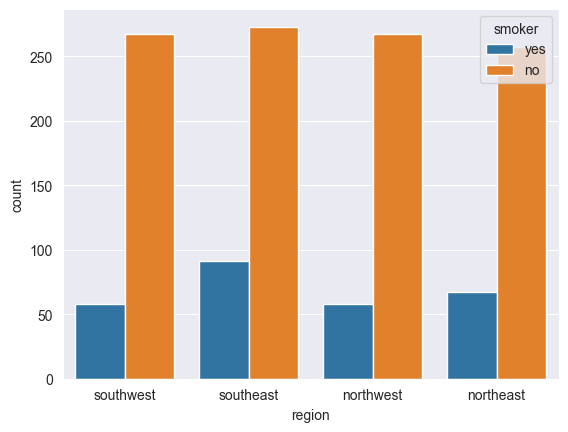

In [45]:
sns.countplot(data=df, x="region",hue="smoker")

<Axes: >

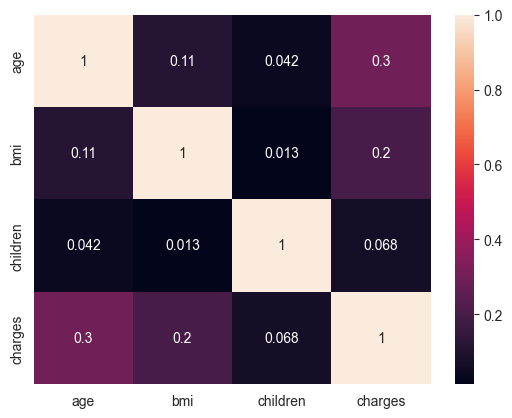

In [48]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

**FEATURE ENGİNEERİNG**

In [49]:
df["sex"] = df["sex"].replace({"female": 0, "male": 1}).astype(int)

C:\Users\cemal\AppData\Local\Temp\ipykernel_23884\2419042342.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sex"] = df["sex"].replace({"female": 0, "male": 1}).astype(int)


In [51]:
df["smoker"] = df["smoker"].replace({"yes": 1, "no": 0}).astype(int)

C:\Users\cemal\AppData\Local\Temp\ipykernel_23884\1513347017.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["smoker"] = df["smoker"].replace({"yes": 1, "no": 0}).astype(int)


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [53]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [54]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [55]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


<Axes: >

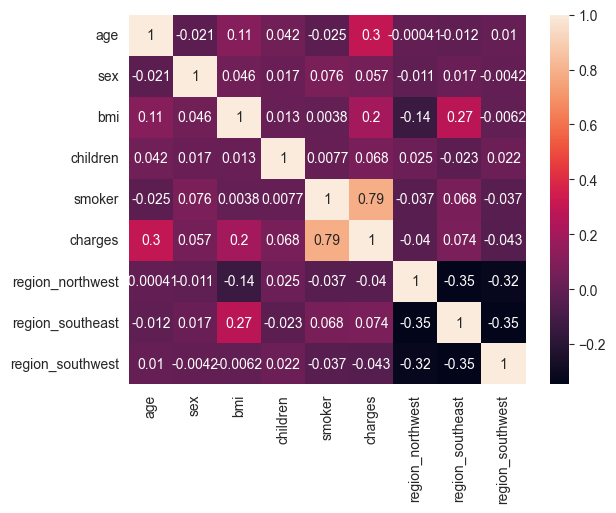

In [56]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

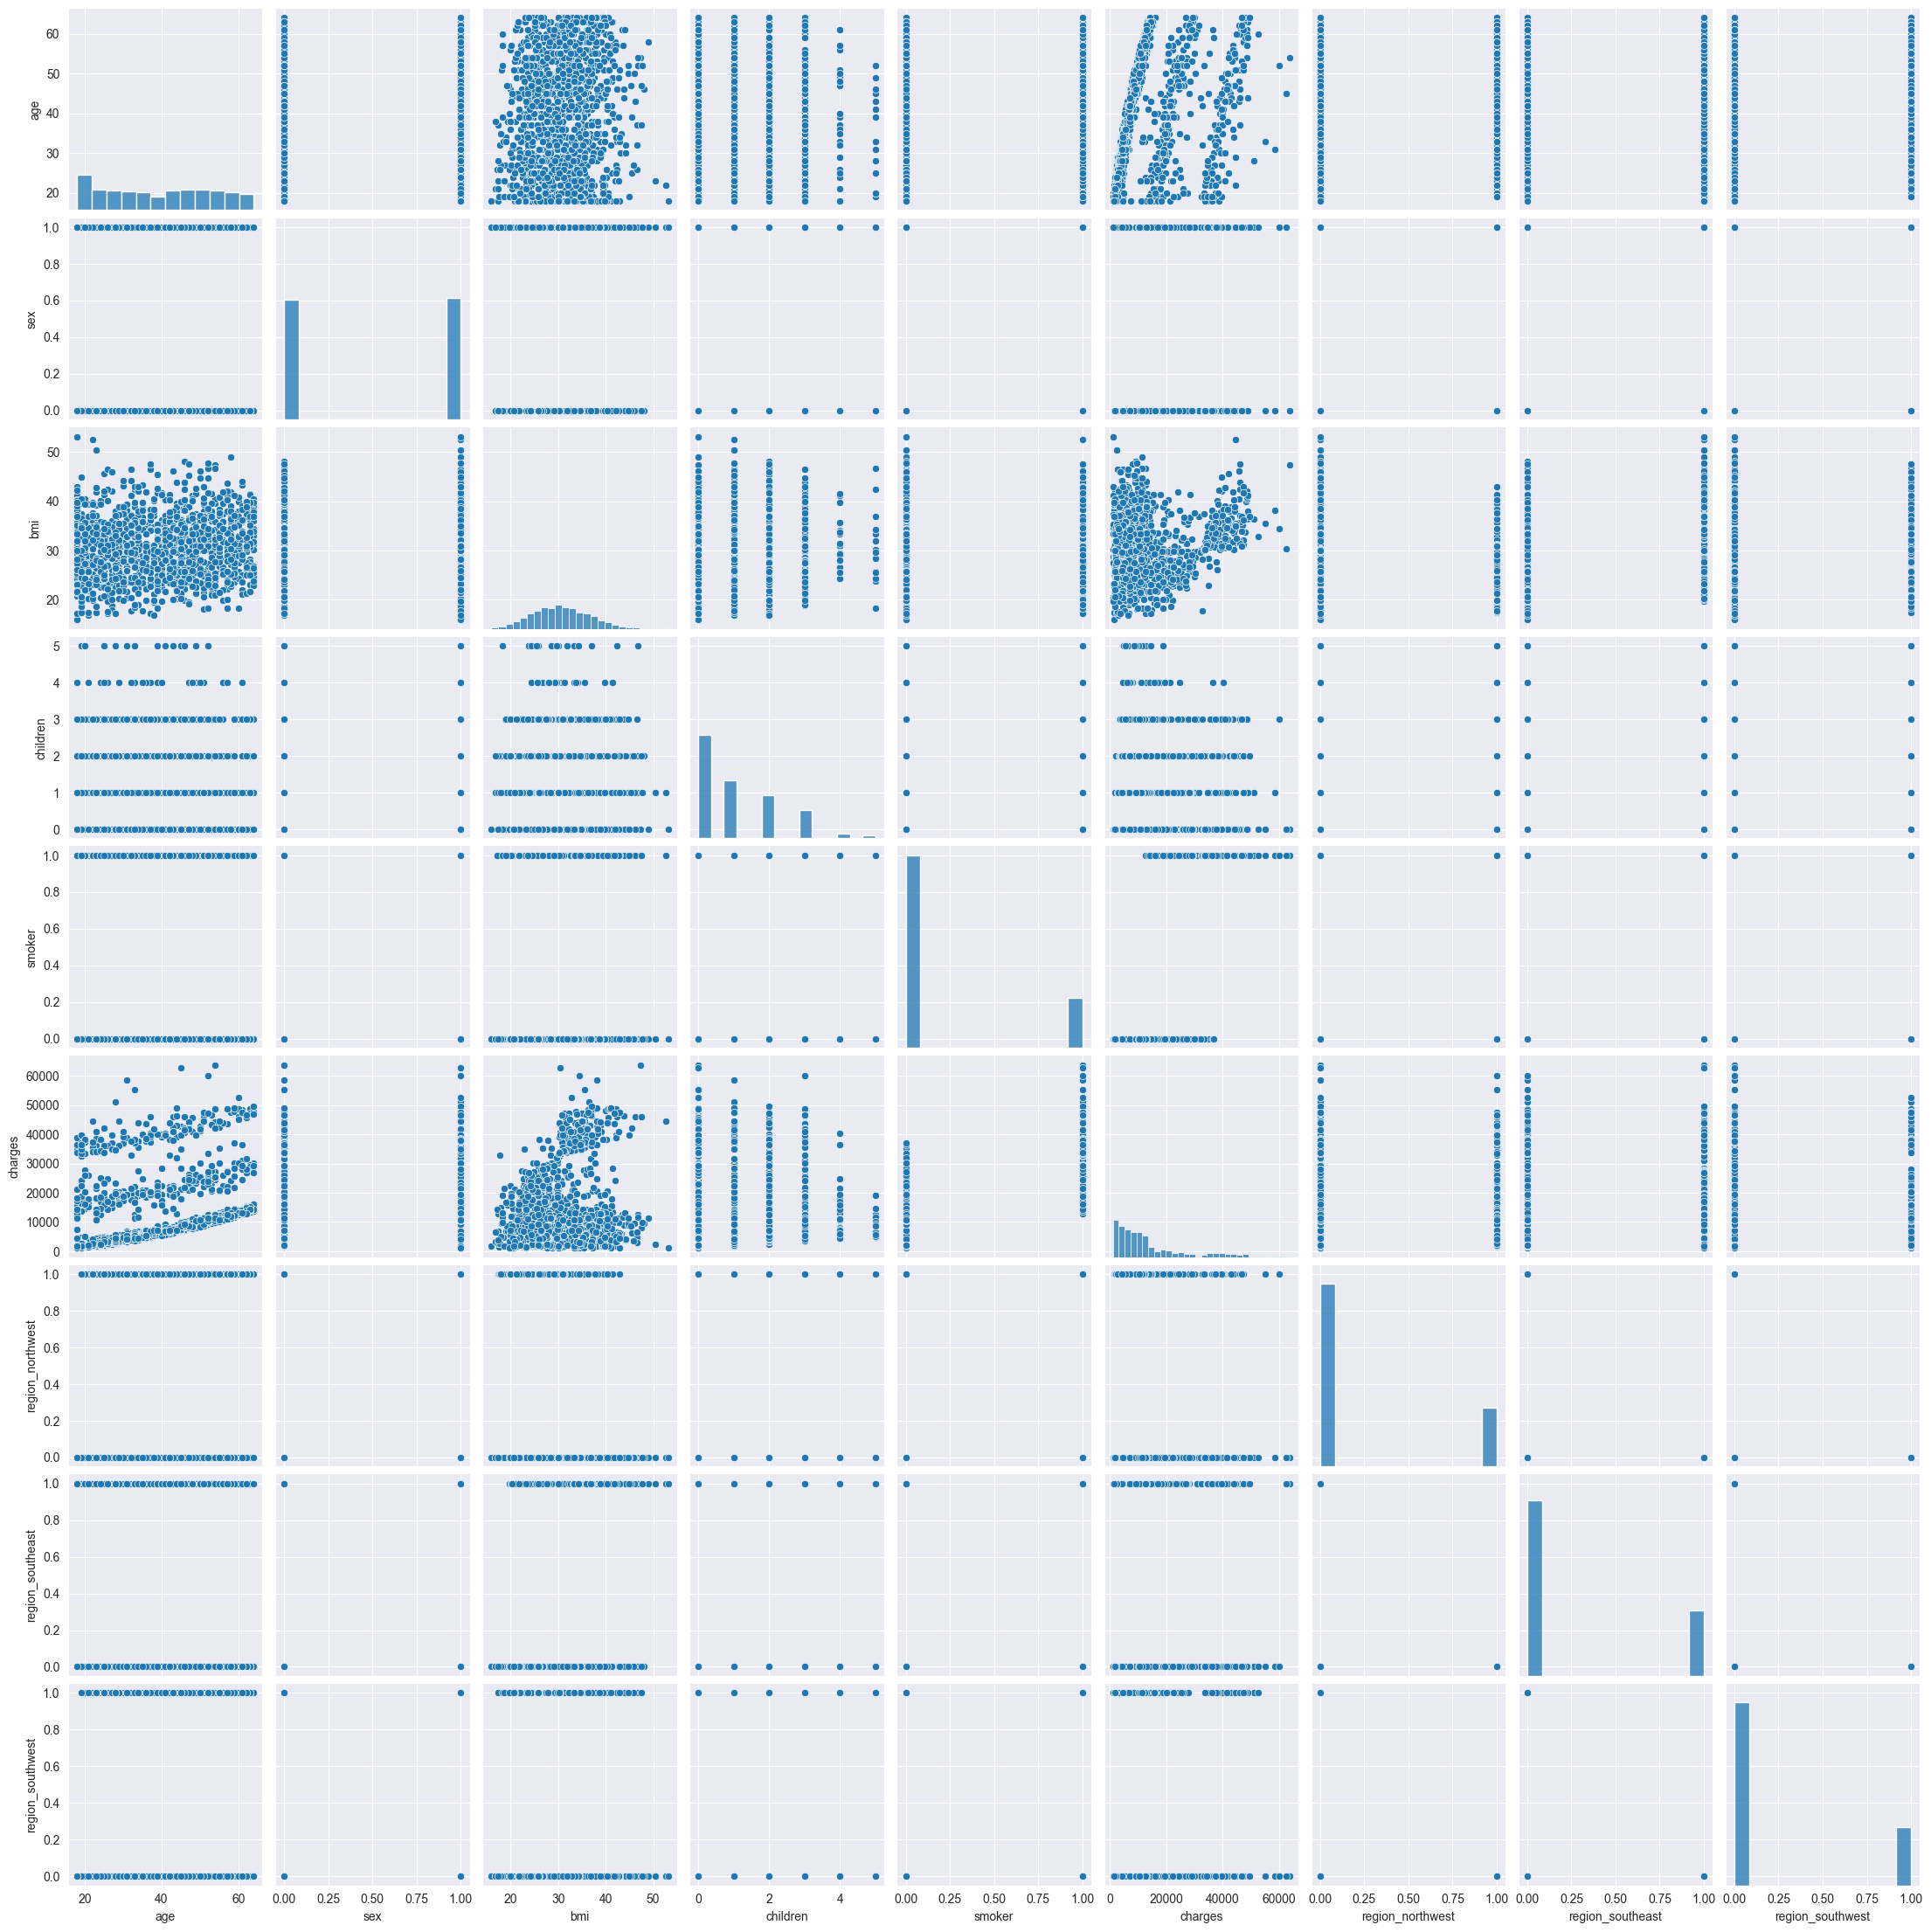

In [57]:
sns.pairplot(df)

In [58]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [59]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
581,19,1,30.59,0,0,1639.5631,True,False,False


In [60]:
df = df.drop_duplicates(keep="first")

In [62]:
df.duplicated().value_counts()

False    1337
Name: count, dtype: int64

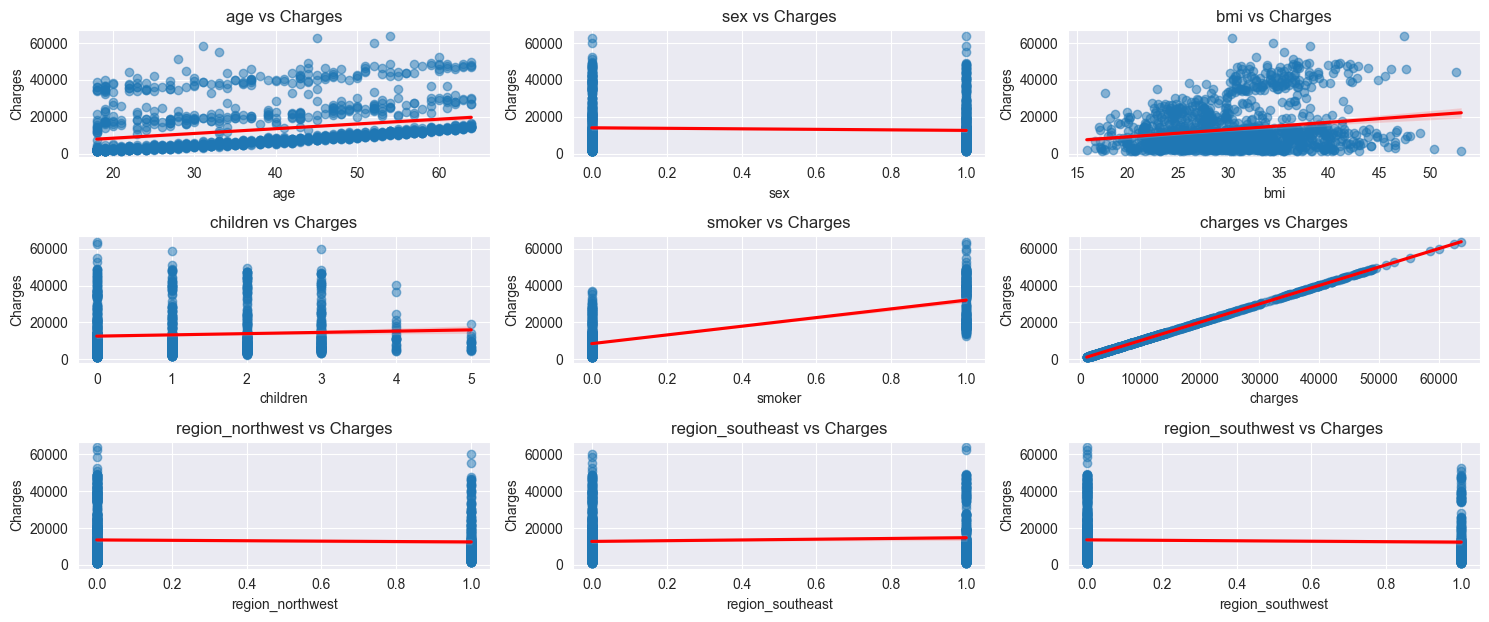

In [20]:
"""plt.figure(figsize=(15,10))

for i, col in enumerate(numeric_features):
    plt.subplot(5, 3, i+1)
    sns.regplot(
        x=df_region[col],
        y=df_region['charges'],
        scatter_kws={'alpha':0.5},
        line_kws={'color':'red'}
    )
    plt.title(f"{col} vs Charges")
    plt.xlabel(col)
    plt.ylabel("Charges")
    plt.tight_layout()

plt.show()"""

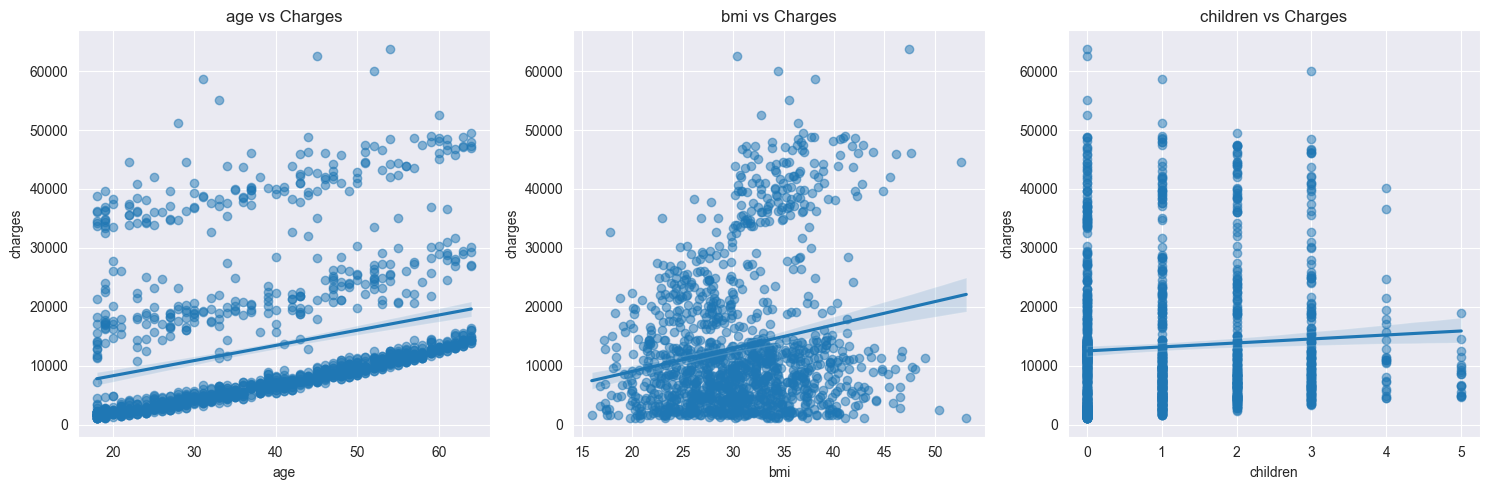

In [21]:
"""cont_features = ['age', 'bmi', 'children']

plt.figure(figsize=(15,5))
for i, col in enumerate(cont_features):
    plt.subplot(1, len(cont_features), i+1)
    sns.regplot(x=df_region[col], y=df_region['charges'], scatter_kws={'alpha':0.5})
    plt.title(f"{col} vs Charges")
plt.tight_layout()
plt.show()"""


In [77]:
X = df.drop(["charges"],axis=1)
y = df["charges"]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [80]:
X_train.corr(numeric_only=True)

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
age,1.000000,-0.030451,0.107204,0.046794,-0.024829,-0.018090,-0.033809,0.038525
sex,-0.030451,1.000000,0.051504,0.007887,0.066279,-0.004170,0.003100,-0.018030
bmi,0.107204,0.051504,1.000000,0.018973,0.015842,-0.135202,0.275677,-0.013422
children,0.046794,0.007887,0.018973,1.000000,0.014755,0.051050,-0.038024,0.014850
smoker,-0.024829,0.066279,0.015842,0.014755,1.000000,-0.034527,0.088966,-0.061402
region_northwest,-0.018090,-0.004170,-0.135202,0.051050,-0.034527,1.000000,-0.344577,-0.320156
region_southeast,-0.033809,0.003100,0.275677,-0.038024,0.088966,-0.344577,1.000000,-0.342710
region_southwest,0.038525,-0.018030,-0.013422,0.014850,-0.061402,-0.320156,-0.342710,1.000000


In [85]:
scaler = StandardScaler()

In [86]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

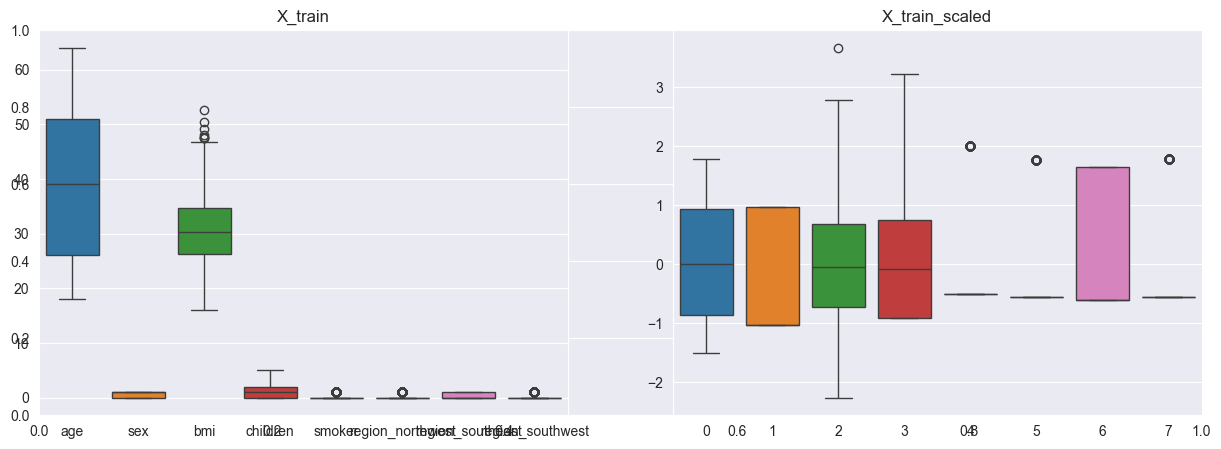

In [92]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train")
plt.subplot(1,2,2)
sns.boxplot(data=X_test_scaled)
plt.title("X_train_scaled")
plt.show()

In [94]:
regressor = LinearRegression()

In [95]:
linear = LinearRegression()
linear.fit(X_train_scaled,y_train)
y_pred = linear.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("r2 = ",r2)
print("mse = ",mse)
print("mae = ",mae)

r2 =  0.7406531576324553
mse =  38684184.55494968
mae =  4335.804476198579


In [96]:
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)

In [97]:
X_train_poly = poly2.fit_transform(X_train)
X_test_poly = poly2.fit_transform(X_test)

In [98]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [101]:
from sklearn.metrics import r2_score  # yeniden import

y_pred = regression.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print("r2 : ",r2)

r2 :  0.8255874841637394


In [104]:
reg = LazyRegressor(verbose=0, ignore_warnings=False,custom_metric=None)  #verbose 1 0 = 0 daha az bilgi 1 ayrıntı bilgi veriyor,
models, predictions = reg.fit(X_train_scaled, X_test_scaled, y_train, y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 1002, number of used features: 8
[LightGBM] [Info] Start training from score 13109.400143


In [105]:
print(models)

                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
GradientBoostingRegressor                    0.84       0.85   4803.28   
BaggingRegressor                             0.84       0.84   4875.31   
RandomForestRegressor                        0.83       0.84   4904.17   
HistGradientBoostingRegressor                0.82       0.83   5066.20   
LGBMRegressor                                0.82       0.83   5091.26   
XGBRegressor                                 0.81       0.82   5235.91   
ExtraTreesRegressor                          0.81       0.82   5242.98   
AdaBoostRegressor                            0.81       0.81   5281.66   
KNeighborsRegressor                          0.78       0.78   5701.03   
OrthogonalMatchingPursuitCV                  0.74       0.75   6166.46   
LassoCV                                      0.74       0.74   6209.29   
LassoLarsCV                           

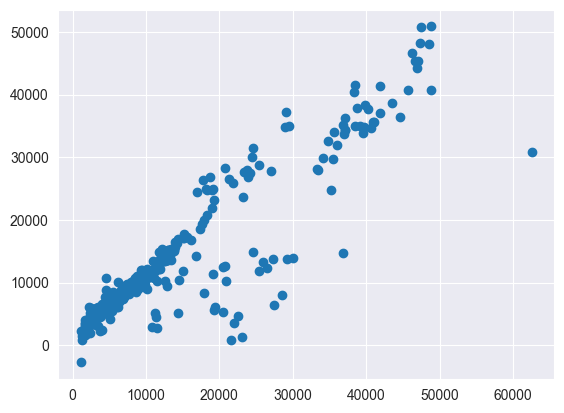

In [108]:
plt.scatter(y_test,y_pred)

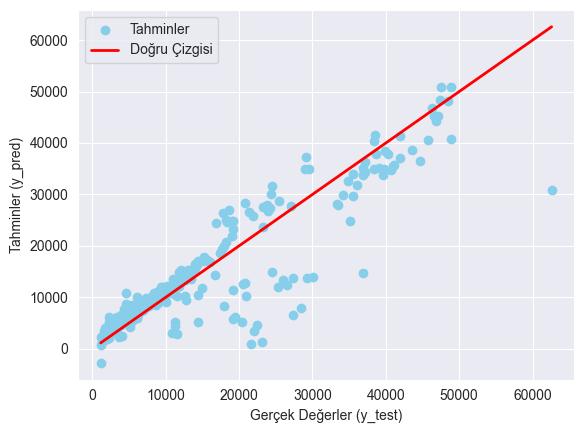

In [113]:
plt.scatter(y_test, y_pred, color='skyblue', label='Tahminler')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Doğru Çizgisi')
plt.xlabel("Gerçek Değerler (y_test)")
plt.ylabel("Tahminler (y_pred)")
plt.legend()
plt.show()
